# Intro

## Load

### Standards

In [1]:
import os, sys, pickle
import numpy as np
from tqdm.notebook import trange, tqdm
import re

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1


In [3]:
from multiprocess import Pool

In [4]:
import igraph

### Homemade modules

In [5]:
from tesste import tesste
from ppp import ppp
from readers_and_converters import file2text, text2dict, text2vec

## Stoopid infos

In [6]:
L_SDGS=17

## Stoopid functions

In [7]:
def a_fdr(alpha, pval_vec):
    ord_pvs=np.sort(pval_vec)
    lopvs=len(ord_pvs)
    if lopvs>0:
        fdr_tests=ord_pvs[ord_pvs<=alpha/lopvs*(1+np.arange(lopvs))]
        if len(fdr_tests)>0:
            return fdr_tests[-1]
        else:
            return 0
    return 0

# Data

In [8]:
with open ('./data/energy_utilities_texts.pickle', 'rb') as f:
    text_dict=pickle.load(f)

# Semantic analysis per report

## Cosine similarity calculations

In [ ]:
cos_sim_dict={}
for year in trange(2015, 2024, desc='years'):
    s_year=str(year)
    cos_sim_dict[year]={}
    energy_co_s=list(text_dict['Energy'][s_year].keys())
    # inside energy
    energy_cos_sims=np.zeros((len(energy_co_s), len(energy_co_s)))
    energy_pvals=np.zeros((len(energy_co_s), len(energy_co_s)))
    for i_e, energy_co_0 in enumerate(tqdm(energy_co_s, leave=False, desc='Energy '+s_year)):
        text_0=text_dict['Energy'][s_year][energy_co_0]
        for j_e in range(i_e+1, len(energy_co_s)):
            energy_co_1=energy_co_s[j_e]
            text_1=text_dict['Energy'][s_year][energy_co_1]
            cacca=tesste(text_0, text_1, n_sample=200)
            energy_cos_sims[i_e, j_e]=cacca.cos_sim
            energy_pvals[i_e, j_e]=cacca.pval
            
    cos_sim_dict[year]['Energy']={}
    cos_sim_dict[year]['Energy']['cos_sim']=energy_cos_sims
    cos_sim_dict[year]['Energy']['pvals']=energy_pvals
    
    utilities_co_s=list(text_dict['Utilities'][s_year].keys())
    utilities_cos_sims=np.zeros((len(utilities_co_s), len(utilities_co_s)))
    utilities_pvals=np.zeros((len(utilities_co_s), len(utilities_co_s)))
    # inside utilities
    for i_e, utilities_co_0 in enumerate(tqdm(utilities_co_s, leave=False, desc='Utilities '+s_year)):
        text_0=text_dict['Utilities'][s_year][utilities_co_0]
        for j_e in range(i_e+1, len(utilities_co_s)):
            utilities_co_1=utilities_co_s[j_e]
            text_1=text_dict['Utilities'][s_year][utilities_co_1]
            cacca=tesste(text_0, text_1, n_sample=200)
            utilities_cos_sims[i_e, j_e]=cacca.cos_sim
            utilities_pvals[i_e, j_e]=cacca.pval
            
    cos_sim_dict[year]['Utilities']={}
    cos_sim_dict[year]['Utilities']['cos_sim']=utilities_cos_sims
    cos_sim_dict[year]['Utilities']['pvals']=utilities_pvals


years:   0%|          | 0/9 [00:00<?, ?it/s]

Energy 2015:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

/home/sarawalk/sdgs_py38/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu


Utilities 2015:   0%|          | 0/1 [00:00<?, ?it/s]

Energy 2016:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Utilities 2016:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Energy 2017:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Utilities 2017:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Energy 2018:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Utilities 2018:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Energy 2019:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Utilities 2019:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Energy 2020:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

In [16]:
print('Done!')

Done!


### Something I forgot

In [17]:
for year in range(2015, 2024):
    s_year=str(year)
    for field in ['Energy', 'Utilities']:
        firms=list(text_dict[field][s_year].keys())
        cos_sim_dict[year][field]['companies']=firms

In [18]:
with open ('./data/energy_utilities_cos_sim_mats.pickle', 'wb') as f:
    pickle.dump(cos_sim_dict, f)

## Cosine similarity analysis

In [9]:
with open ('./data/energy_utilities_cos_sim_mats.pickle', 'rb') as f:
    cos_sim_dict=pickle.load(f)

In [10]:
years=list(range(2015, 2024))

### Statistical validation

In [11]:
# actually, it shouldn't be done, but I saw that relaxing from alpha=0.01 to alpha=0.05,
# I get more validated entries...
alpha=.05

In [12]:
for year in years:
    for field in ['Energy', 'Utilities']:
        pvals=cos_sim_dict[year][field]['pvals']
        cos_sim=cos_sim_dict[year][field]['cos_sim']
        firms=cos_sim_dict[year][field]['companies']
        if len(firms)>1:
            # get the number of tests
            n_tests=len(firms)*(len(firms)-1)/2
            # calculate effective alpha according to Bonferroni
            alpha_bonf=alpha/n_tests
            # get the effective alpha according to fdr
            pvals_vec=np.sort(pvals[pvals>0])
            fdr_vec=(1+np.arange(len(pvals_vec)))*alpha_bonf
            alpha_fdrs=fdr_vec[pvals_vec<=fdr_vec]
            if len(alpha_fdrs)>0:
                alpha_fdr=alpha_fdrs[-1]
                # where are the validated entries?
                where_vals=np.where(np.logical_and(pvals<=alpha_fdr, pvals>0))
                val_couples=[]
                for i in range(len(where_vals[0])):
                    val_couples.append((firms[where_vals[0][i]],firms[where_vals[1][i]]))
                # return values
                print(year, field)
                print('---------------------')
                for i, val_couple in enumerate(val_couples):
                    print(val_couple, cos_sim[where_vals[0][i], where_vals[1][i]])

2019 Utilities
---------------------
('02_SSE_PLC', '05_CENTRICA_PLC') 0.8133289217948914
('02_SSE_PLC', '08_RENEWI_PLC') 0.8001610636711121
('05_CENTRICA_PLC', '08_RENEWI_PLC') 0.7937230467796326
('05_CENTRICA_PLC', '10_GOOD_ENERGY_GROUP_PLC') 0.8450196981430054


Quite bizarre that only on a single year (btw, before the COVID, i.e. before when I would have expected to see some excess in the cosine similarity) there is such a diffuse similarity. Moreover, CENTRICA is (ehm...) the most central, since it is significantly similar to all others.

In [13]:
validated_cos_sim=(2019, 'Utilities', val_couples)

### Graph representation

In [14]:
vertices=[]
weights=[]
for i, val_couple in enumerate(val_couples):
    for who in val_couple:
        if who not in vertices:
            vertices.append(who)
    weight=cos_sim_dict[2019]['Utilities']['cos_sim'][where_vals[0][i], where_vals[1][i]]
    weights.append(weight)

In [15]:
vertices

['02_SSE_PLC', '05_CENTRICA_PLC', '08_RENEWI_PLC', '10_GOOD_ENERGY_GROUP_PLC']

In [16]:
weights

[0.8133289217948914,
 0.8001610636711121,
 0.7937230467796326,
 0.8450196981430054]

In [17]:
val_cos_sim_g=igraph.Graph()
val_cos_sim_g.add_vertices(vertices)
val_cos_sim_g.add_edges(val_couples)

In [18]:
val_cos_sim_g.vcount(), val_cos_sim_g.ecount()

(4, 4)

In [19]:
val_cos_sim_g.es['weight']=weights

In [20]:
val_cos_sim_g.summary()

'IGRAPH UNW- 4 4 -- \n+ attr: name (v), weight (e)'

In [33]:
val_cos_sim_g.vs["label"]=['SSE PLC', 'Centrica PLC', 'Renewi PLC', 'Good Energy Group PLC']

In [60]:
visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_label"] = val_cos_sim_g.vs["label"]
visual_style["vertex_label_dist"] = 1.5
visual_style["vertex_label_angle"] = [0, np.pi, np.pi/2, np.pi]
visual_style["edge_label"] = ['{:.3f}'.format(weight) for weight in val_cos_sim_g.es["weight"]]
visual_style["bbox"] =(300,300)
visual_style["margin"]=40

In [63]:
igraph.plot(val_cos_sim_g, './Plots/Sbert_entire_val_graph.png', **visual_style)

OSError: [Errno cairo returned CAIRO_STATUS_WRITE_ERROR: b'error while writing to output stream'] 11

### SDGs superposition

In [26]:
with open ('./data/energy_utilities_cos_sim_mats.pickle', 'rb') as f:
    cos_sim_dict=pickle.load(f)

In [27]:
with open ('./data/sdgs_dict.pickle', 'rb') as f:
    sdgs_dict=pickle.load(f)

In [28]:
v_year=validated_cos_sim[0]
v_field=validated_cos_sim[1]

In [29]:
companies=list(sdgs_dict[v_year][v_field].keys())

In [30]:
sdg_superpos=np.zeros((len(companies),len(companies)))
for i_c, company_0 in enumerate(companies):
    sdgs_i_c=list(sdgs_dict[v_year][v_field][company_0].keys())
    for j_c, company_1 in enumerate(companies):
        if i_c!=j_c:
            sdgs_j_c=list(sdgs_dict[v_year][v_field][company_1].keys())
            sdg_superpos[i_c, j_c]=len([sdg for sdg in sdgs_i_c if sdg in sdgs_j_c])/len(sdgs_i_c)

In [31]:
sdg_superpos

array([[0.        , 0.66666667, 0.46666667, 0.73333333],
       [1.        , 0.        , 0.4       , 0.8       ],
       [0.875     , 0.5       , 0.        , 0.75      ],
       [1.        , 0.72727273, 0.54545455, 0.        ]])

Not such a huge similarity. Where does the similarity come from? **To-Do**: manually read the reports.

# Semantic analysis per SDG

## Load data

In [32]:
with open ('./data/sdgs_dict.pickle', 'rb') as f:
    sdgs_dict=pickle.load(f)

In [33]:
years=list(range(2015, 2024))

In [34]:
fields=['Energy', 'Utilities']

## Check on theoretical p-values

In [35]:
with open('./data/csps_dict.pickle', 'rb') as f:
        csps_dict=pickle.load(f)

In [36]:
csps_dict.keys()

dict_keys([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [37]:
theo_pvs={}
sam_pvs={}
for year in csps_dict.keys():
    theo_pvs[year]={}
    sam_pvs[year]={}
    for sector in csps_dict[year].keys():
        theo_pvs[year][sector]=[]
        sam_pvs[year][sector]=[]
        for key in csps_dict[year][sector].keys():
            if key!='firms':
                for p_val in csps_dict[year][sector][key]['theo_pvals']:
                    theo_pvs[year][sector].append(p_val)
                for p_val in csps_dict[year][sector][key]['sam_pvals']:
                    sam_pvs[year][sector].append(p_val)

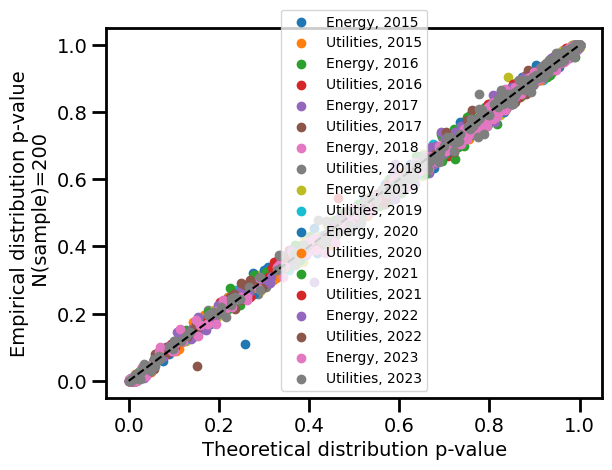

In [38]:
for year in csps_dict.keys():
    for sector in csps_dict[year].keys():
        plt.scatter(theo_pvs[year][sector], sam_pvs[year][sector], label=sector+', '+str(year))
plt.plot([0,1], [0, 1], ls='--', c='black')
plt.xlabel('Theoretical distribution p-value', fontsize=14)
plt.ylabel('Empirical distribution p-value\n N(sample)=200', fontsize=14)
plt.legend()
plt.show()

Almost good...

## Validation

In [39]:
alpha=0.05

In [42]:
for year in csps_dict.keys():
    for sector in csps_dict[year].keys():
        for sdg in csps_dict[year][sector].keys():
            if sdg=='firms':
                _firms=csps_dict[year][sector]['firms']
            else:
                sams=csps_dict[year][sector][sdg]['sam_pvals']
                a_eff=a_fdr(alpha, sams)
                if a_eff>0:
                    print(sector, year, sdg, a_eff)
                    fdr_mask=np.array(sams)<=a_eff
                    val_cos_sim=np.array(csps_dict[year][sector][sdg]['cos_sim'])[fdr_mask]
                    validated_couples=np.array(csps_dict[year][sector][sdg]['firms'])[fdr_mask]
                    print(validated_couples, val_cos_sim)
                    print('------------------------')

Energy 2015 SDG 4: Quality Education 0.02
[['01_shell' '02_BP']] [0.46866873]
------------------------
Utilities 2019 SDG 15: Life on Land 0.015
[['02_SSE_PLC' '10_GOOD_ENERGY_GROUP_PLC']] [0.52075732]
------------------------
Energy 2020 SDG 3: Good Health and Well-being 0.01
[['04_energeans' '07_SERICA_ENERGY_PLC']
 ['04_energeans' '10_DIVERSIFIED_ENERGY_COMPANY_PLC']
 ['07_SERICA_ENERGY_PLC' '10_DIVERSIFIED_ENERGY_COMPANY_PLC']] [0.67243159 0.62456167 0.87880749]
------------------------
Energy 2020 SDG 5: Gender Equality 0.005
[['04_energeans' '07_SERICA_ENERGY_PLC']
 ['07_SERICA_ENERGY_PLC' '10_DIVERSIFIED_ENERGY_COMPANY_PLC']] [0.71372986 0.80089968]
------------------------
Energy 2020 SDG 10: Reduced Inequality 0.005
[['07_SERICA_ENERGY_PLC' '10_DIVERSIFIED_ENERGY_COMPANY_PLC']] [0.88279593]
------------------------
Energy 2020 SDG 14: Life Below Water 0.005
[['07_SERICA_ENERGY_PLC' '10_DIVERSIFIED_ENERGY_COMPANY_PLC']] [0.6896764]
------------------------
Energy 2021 SDG 6: Cl

In [ ]:
print("Check di cosa c'è")